# Time series analysis on the data international Airline passengers from 1940 to 1960

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# load the data 
df = pd.read_csv("AirPassangers.csv")
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
# Rename the column
df.rename(columns={"International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60":"Passengers"}, inplace=True)


In [4]:
df.head()

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
df.columns

Index(['Month', 'Passengers'], dtype='object')

In [6]:
df.shape

(145, 2)

Text(0, 0.5, 'Passengers')

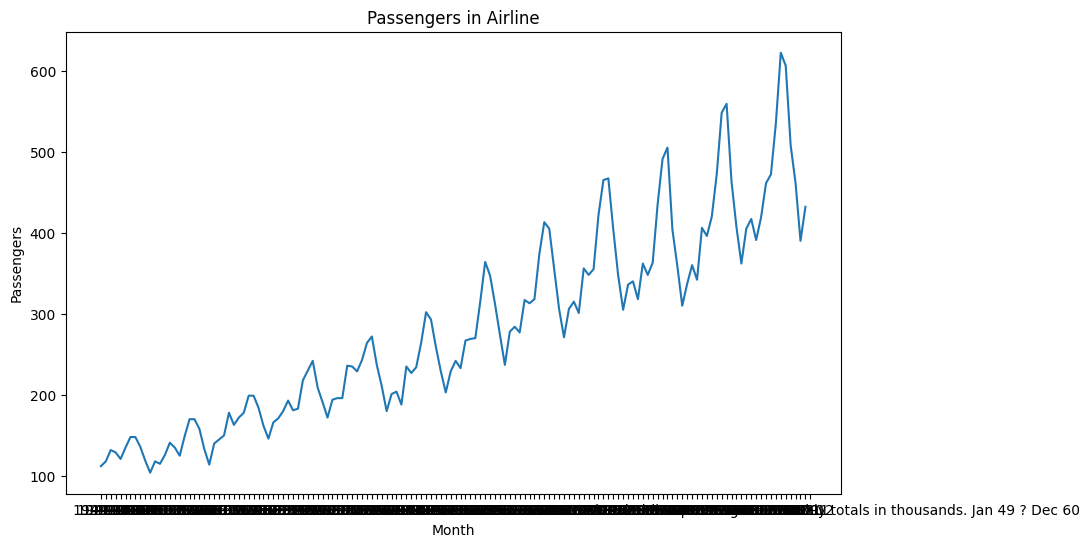

In [7]:
plt.figure(figsize=(10,6))
plt.plot(df["Month"],df["Passengers"])
plt.title("Passengers in Airline")
plt.xlabel("Month")
plt.ylabel("Passengers")

<Axes: xlabel='Month', ylabel='Passengers'>

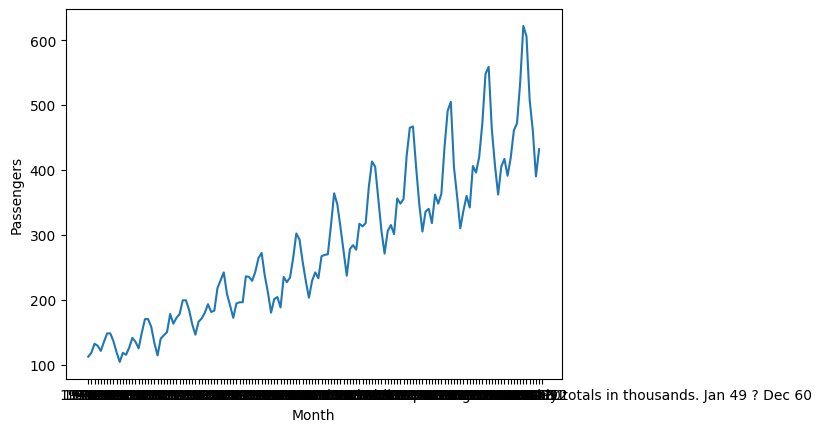

In [8]:
# Also plot on seaborn library 
sns.lineplot(data=df,x="Month",y="Passengers")

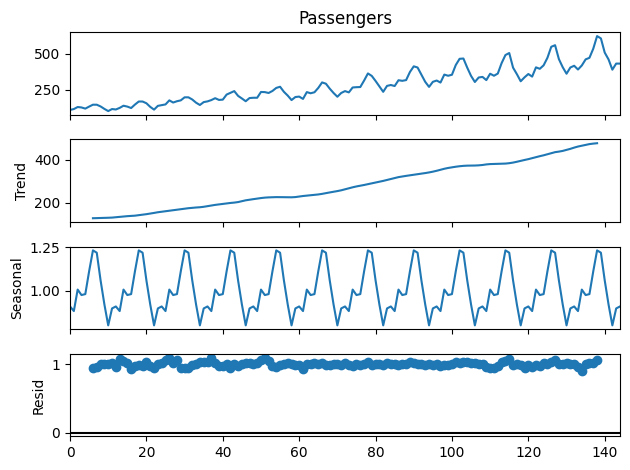

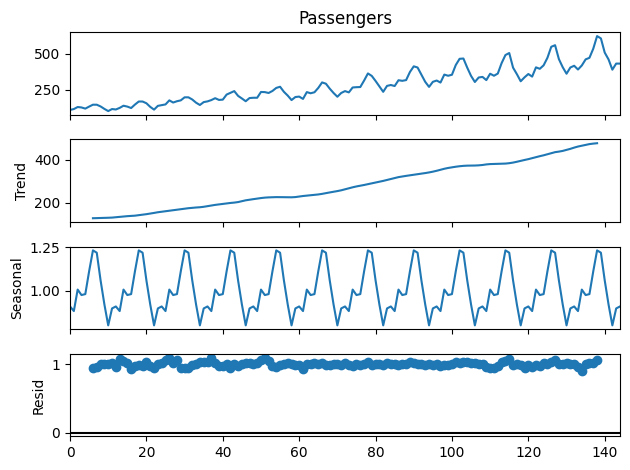

In [16]:
# Decompose the data into trend, seasonality and residuals
decompose = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)

# Plot the decomposition
decompose.plot()

<Axes: >

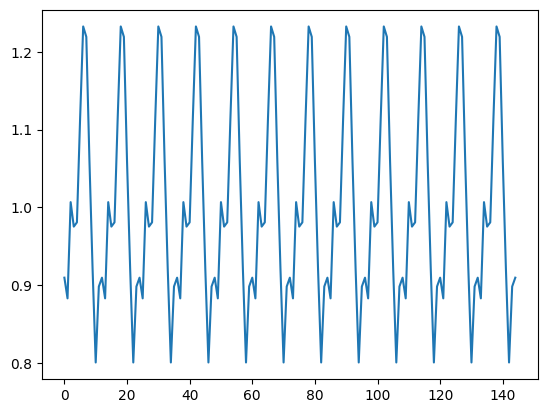

In [18]:
decompose.seasonal.plot()

In [20]:
trend=decompose.trend
residual=decompose.resid
seasonal=decompose.seasonal

In [21]:
df.head()

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


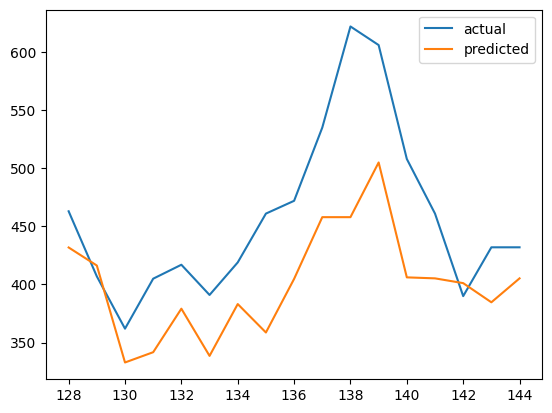

In [40]:
from sklearn.model_selection import GridSearchCV

# define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3, 0.5],
    'n_estimators': [50, 100, 200]
}

# create a GridSearchCV object with the XGBoost model and the hyperparameter grid
grid_search = GridSearchCV(xgb.XGBRegressor(), param_grid, cv=5)

# fit the grid search to the training data
grid_search.fit(X_train, y_train)

# get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# train the best model on the full training data
best_model.fit(X_train, y_train)

# make predictions on the testing set using the best model
predictions = best_model.predict(X_test)

# plot the actual and predicted values
plt.plot(test.index[-len(predictions):], test["Passengers"].values[-len(predictions):], label="actual")
plt.plot(test.index[-len(predictions):], predictions, label="predicted")
plt.legend()
plt.show()

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 15057.1328 - root_mean_squared_error: 122.2636
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2603.7131 - root_mean_squared_error: 50.6427 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 368.7569 - root_mean_squared_error: 19.0998 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 530.2806 - root_mean_squared_error: 22.9705 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 371.6502 - root_mean_squared_error: 19.2273  
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 329.0303 - root_mean_squared_error: 17.9529
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 375.3584 - root_mean_squared_error: 19.3341 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 356.5761 - root_mean_squared_error: 18.8408 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 356.4449 - root_mean_squared_error: 18.8514 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3

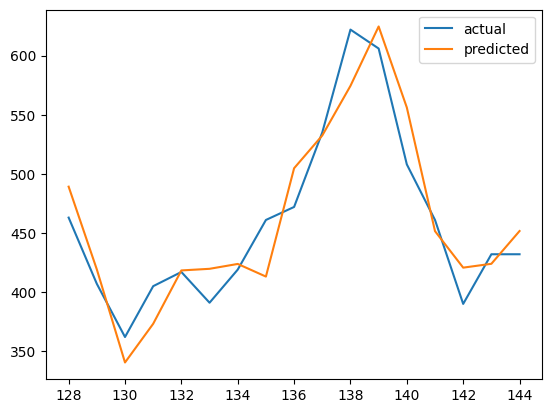

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import RootMeanSquaredError

# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

# define the number of lagged time steps to use as input features
n_lags = 12

# create the input and output data for the neural network
X_train = np.array([train["Passengers"].values[i:i+n_lags] for i in range(len(train)-n_lags)])
y_train = np.array(train["Passengers"].values[n_lags:])
X_test = np.array([test["Passengers"].values[i:i+n_lags] for i in range(len(test)-n_lags)])
y_test = np.array(test["Passengers"].values[n_lags:])

# create the neural network model
model = Sequential()
model.add(Dense(10, input_dim=n_lags, activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[RootMeanSquaredError()])

# train the neural network model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# make predictions on the testing set using the trained model
predictions = model.predict(X_test)

# plot the actual and predicted values
plt.plot(test.index[-len(predictions):], test["Passengers"].values[-len(predictions):], label="actual")
plt.plot(test.index[-len(predictions):], predictions, label="predicted")
plt.legend()
plt.show()
